# Exploring Other Aspects of Wind Turbines

In [2]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

# Import Data
city = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/city_attributes.csv')
humidity = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/humidity.csv')
pressure = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/pressure.csv')
temperature = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/temperature.csv')
weather_description = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/weather_description.csv')
wind_direction = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/wind_direction.csv')
wind_speed = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/wind_speed.csv')

In [2]:
# Observing different cities that are in the data set 
print(city.head())

# Grouping the cities by country because we want to focus on the weather for the US
# Also using sets because it is faster to traverse
us_city = city.loc[city['Country'] == 'United States']
us_city = us_city['City']

us_city_set = set()
for cities in us_city:
    us_city_set.add(cities)

            City        Country   Latitude   Longitude
0      Vancouver         Canada  49.249660 -123.119339
1       Portland  United States  45.523449 -122.676208
2  San Francisco  United States  37.774929 -122.419418
3        Seattle  United States  47.606209 -122.332069
4    Los Angeles  United States  34.052231 -118.243683


In [3]:
# Function that drops cities that are not in the United States
def remove_nonUS(dataframe):
    for city in dataframe.columns[1:]:
        if city not in us_city_set:
            try:
                dataframe.drop(city, axis = 1, inplace=True)
            except:
                pass
    return dataframe

# Removing all the cities that are not in the United States from all dataframes 
all_tables = [humidity, pressure, temperature, weather_description, wind_direction, wind_speed]
for table in all_tables:
    table = remove_nonUS(table)

In [4]:
# Drop the NaN in the first columns of all the tables
for table in all_tables:
    table.dropna(inplace=True)
    # Change the datetime column into an actual datetime
    table['datetime'] = pd.to_datetime(table['datetime'], format = '%Y-%m-%d %H:%M:%S')
    # Set the datetime as the index 
    table.index = table['datetime']
    table.drop('datetime', axis = 1, inplace=True)

for table in all_tables:
    print(table.head())

                     Portland  San Francisco  Seattle  Los Angeles  San Diego  \
datetime                                                                        
2012-10-01 13:00:00      81.0           88.0     81.0         88.0       82.0   
2012-10-01 14:00:00      80.0           87.0     80.0         88.0       81.0   
2012-10-01 15:00:00      80.0           86.0     80.0         88.0       81.0   
2012-10-01 16:00:00      80.0           85.0     79.0         88.0       81.0   
2012-10-01 17:00:00      79.0           84.0     79.0         88.0       80.0   

                     Las Vegas  Phoenix  Albuquerque  Denver  San Antonio  \
datetime                                                                    
2012-10-01 13:00:00       22.0     23.0         50.0    62.0         93.0   
2012-10-01 14:00:00       21.0     23.0         49.0    62.0         92.0   
2012-10-01 15:00:00       21.0     23.0         49.0    62.0         92.0   
2012-10-01 16:00:00       21.0     23.0        

In [5]:
# These are the cities that we will be exploring in this project 
print(us_city)

1          Portland
2     San Francisco
3           Seattle
4       Los Angeles
5         San Diego
6         Las Vegas
7           Phoenix
8       Albuquerque
9            Denver
10      San Antonio
11           Dallas
12          Houston
13      Kansas City
14      Minneapolis
15      Saint Louis
16          Chicago
17        Nashville
18     Indianapolis
19          Atlanta
20          Detroit
21     Jacksonville
22        Charlotte
23            Miami
24       Pittsburgh
26     Philadelphia
27         New York
29           Boston
Name: City, dtype: object


We will be exploring these 29 cities from the United States.

## Temperature 

Wind Turbines are required to be shut down in extreme temperatures. If the weather is below -4 farenheiht and above 122 farenheiht, wind turbines are inoperable. Therefore, let's locate the cities where the temperature falls within these extreme temperatures. 

In [6]:
# First, Let's convert the temperature of these different cities from kelvin into fahrenheit 
for column in temperature.columns[:]:
    temperature[column] = (temperature[column] - 273.15) * 9 / 5 + 32

print(temperature.head())

                      Portland  San Francisco    Seattle  Los Angeles  \
datetime                                                                
2012-10-01 13:00:00  48.074000      61.394000  47.570000    65.696000   
2012-10-01 14:00:00  48.079854      61.384987  47.564990    65.692734   
2012-10-01 15:00:00  48.095360      61.359113  47.551699    65.683120   
2012-10-01 16:00:00  48.110866      61.333238  47.538407    65.673506   
2012-10-01 17:00:00  48.126372      61.307364  47.525116    65.663892   

                     San Diego  Las Vegas    Phoenix  Albuquerque     Denver  \
datetime                                                                       
2012-10-01 13:00:00  65.084000  68.468000  74.210000    53.546000  52.628000   
2012-10-01 14:00:00  65.090302  68.455654  74.225315    53.608205  52.623150   
2012-10-01 15:00:00  65.108039  68.435919  74.266677    53.751113  52.609852   
2012-10-01 16:00:00  65.125777  68.416183  74.308039    53.894021  52.596554   
2012-10-

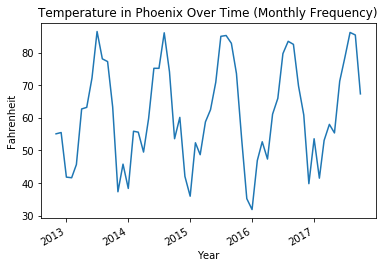

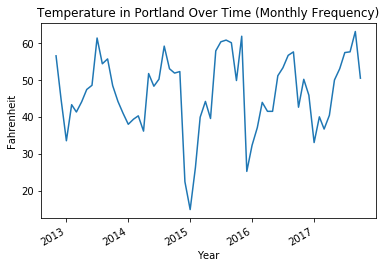

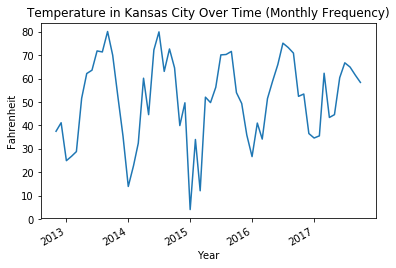

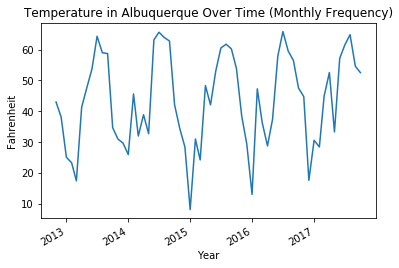

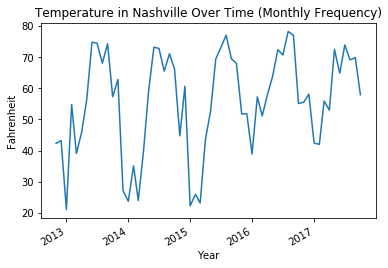

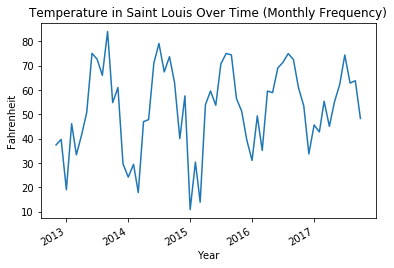

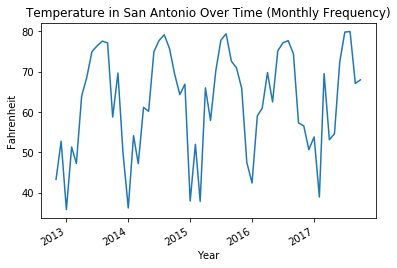

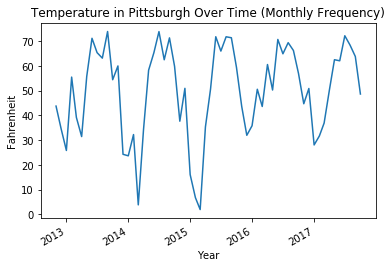

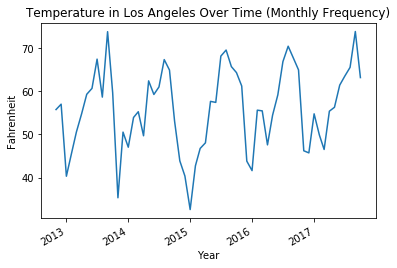

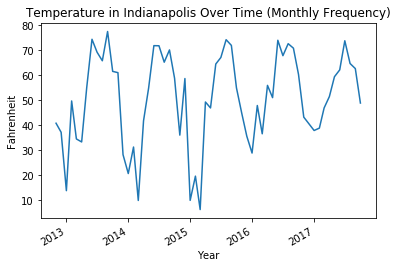

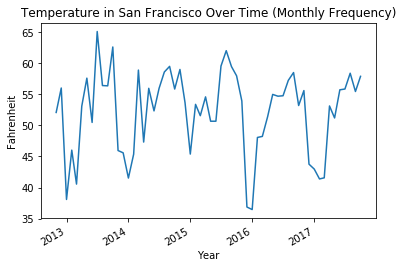

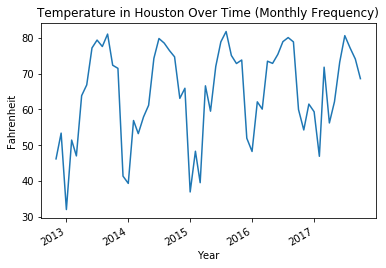

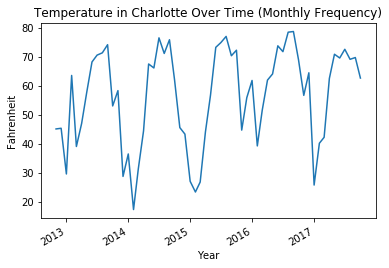

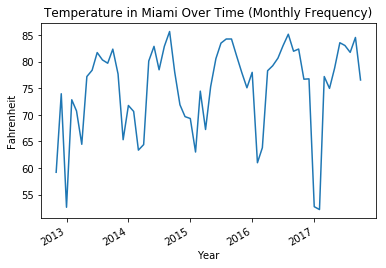

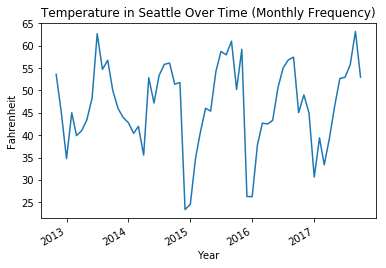

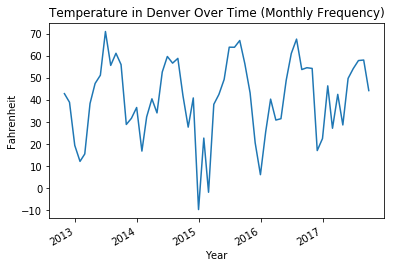

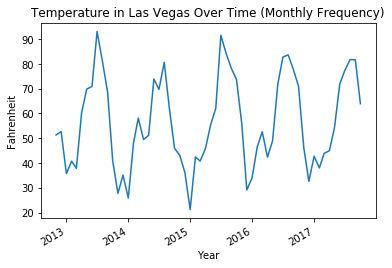

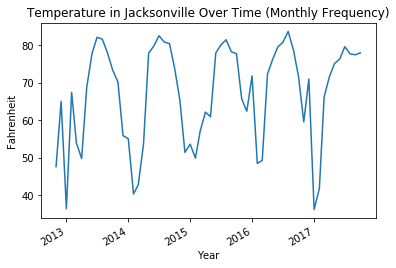

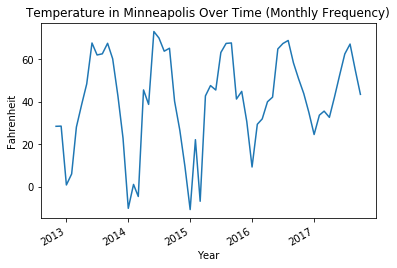

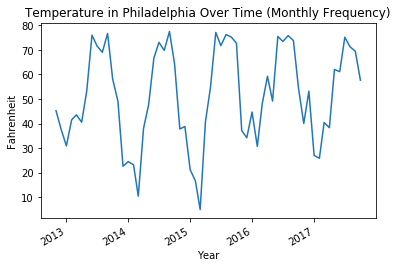

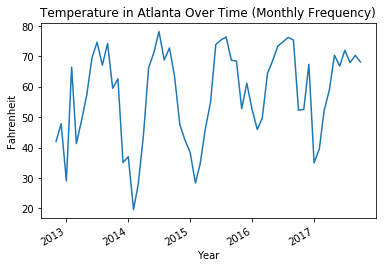

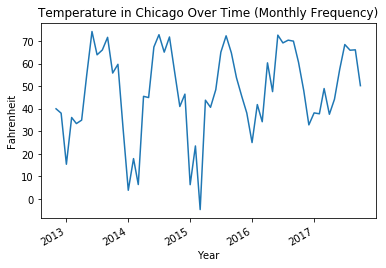

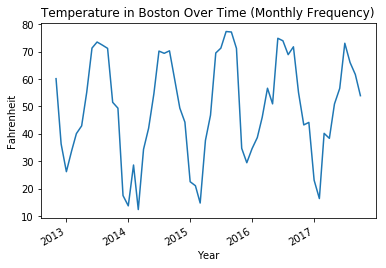

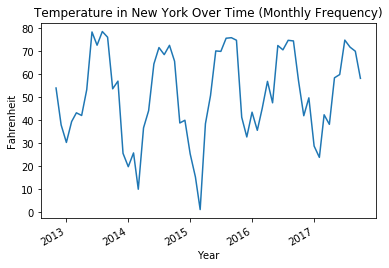

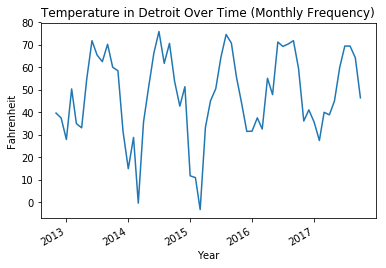

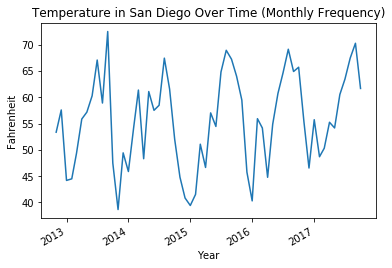

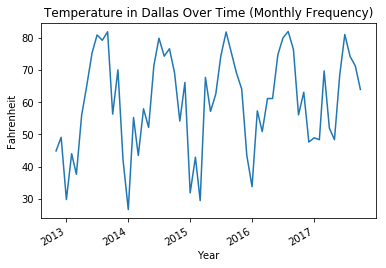

In [7]:
# While the average tells us a little bit about the data, lets take a look at how the temperature changes throughout the year 
for city in us_city_set:
    temperature[city].asfreq('M').plot()
    plt.title('Temperature in ' + city + ' Over Time (Monthly Frequency)')
    plt.xlabel('Year')
    plt.ylabel('Fahrenheit')
    plt.show()


A wind turbine manufacturer states that only extreme temperatures of -4 to 122 Farenheit will affect the efficiency and operation of wind turbines. 

https://www.windturbinestar.com/wind-turbine-annual-output.html 

In [8]:
# Let's find the cities that may be affected by these extreme temperatures 
extreme_temp = {}
for city in temperature.columns[:]:
    if temperature[city].min() < -4:
        extreme_temp[city] = temperature[city].min().round()
    if temperature[city].max() > 122:
        extreme_temp[city] = temperature[city].max().round()
print(extreme_temp)

{'Denver': -14.0, 'Kansas City': -10.0, 'Minneapolis': -23.0, 'Saint Louis': -8.0, 'Chicago': -12.0, 'Indianapolis': -19.0, 'Detroit': -21.0, 'Pittsburgh': -11.0, 'Philadelphia': -9.0, 'New York': -8.0, 'Boston': -10.0}


We can see that within the United States, majority of the extreme temperatures is due to how cold it gets in these cities. Therefore, these cities are not ideal candidates for wind turbines due to the increased maintenance activites, frequent shut downs during winter, and accumulation of ice on wind turbines that reduces power output. 

In [9]:
# Let's dive in deeper to see how many days wind turbines will not be operational 
count_extreme_temp = {}
for city in us_city:
    count_extreme_temp[city] = 0

temp_day = temperature.resample('D').mean()
print(temp_day.head())

for city in temp_day.columns[:]:
    for temp in temp_day[city]:
        if temp < -4:
            count_extreme_temp[city] += 1
        if temp > 122:
            count_extreme_temp[city] += 1
print(count_extreme_temp)

             Portland  San Francisco    Seattle  Los Angeles  San Diego  \
datetime                                                                  
2012-10-01  48.142755      61.279956  47.511072    65.653701  65.162291   
2012-10-02  55.377911      67.654951  53.612399    72.932811  71.854649   
2012-10-03  61.609625      74.802500  58.143125    78.545375  76.511750   
2012-10-04  55.998500      72.566750  52.235000    73.126250  73.275500   
2012-10-05  59.244875      63.473750  52.891250    67.637000  69.339875   

            Las Vegas    Phoenix  Albuquerque     Denver  San Antonio  \
datetime                                                                
2012-10-01  68.376040  74.393131    54.187174  52.569190    61.330942   
2012-10-02  75.377093  82.511542    61.919277  55.541428    65.678822   
2012-10-03  81.575375  85.490750    64.499750  60.075500    67.411250   
2012-10-04  83.606000  84.349250    67.903250  65.198000    67.703750   
2012-10-05  81.461375  83.590250    

We can also observe the number of days wind turbines will not be operational for each city. Generally, wind turbines can run throughout the year for most cities. We can note several cities are not ideal targets for wind turbines as it often gets too cold for wind turbines. 

In [10]:
# Lets look at the cities that have more than 10 days where wind turbines are inoperable
for key, value in count_extreme_temp.items():
    if value > 10:
        print(key, value)

Minneapolis 35


These are the cities where it would be wise to avoid wind turbines as they will have to frequently shut down wind turbines and spend more on maintenance costs due to extreme weathers. 

## Humidity
https://einpart.com/files/catalogs/WTG_components/Cotes-On-Shore.pdf

The effects of humid conditions are as listed:
- It encourages and accelerates corrosion
- Increases the formation of condensation
- Encourages micorbial contamination 
- Can lead to electrical malfunctions 

While humid conditions are not ideal in the long term, they do not impact the operation of wind turbines. While it would be ideal to avoid these humid conditions, there are methods that we can take to avoid these effects of humid conditions. 

In [11]:
print(humidity.head())

                     Portland  San Francisco  Seattle  Los Angeles  San Diego  \
datetime                                                                        
2012-10-01 13:00:00      81.0           88.0     81.0         88.0       82.0   
2012-10-01 14:00:00      80.0           87.0     80.0         88.0       81.0   
2012-10-01 15:00:00      80.0           86.0     80.0         88.0       81.0   
2012-10-01 16:00:00      80.0           85.0     79.0         88.0       81.0   
2012-10-01 17:00:00      79.0           84.0     79.0         88.0       80.0   

                     Las Vegas  Phoenix  Albuquerque  Denver  San Antonio  \
datetime                                                                    
2012-10-01 13:00:00       22.0     23.0         50.0    62.0         93.0   
2012-10-01 14:00:00       21.0     23.0         49.0    62.0         92.0   
2012-10-01 15:00:00       21.0     23.0         49.0    62.0         92.0   
2012-10-01 16:00:00       21.0     23.0        

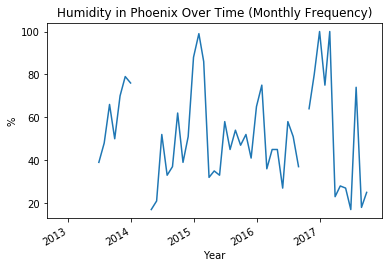

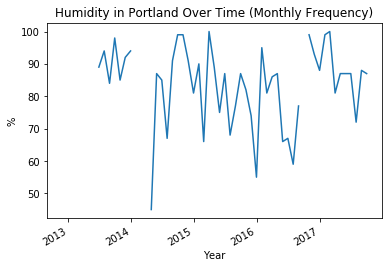

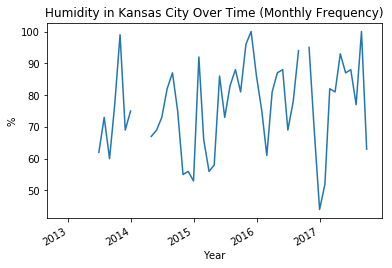

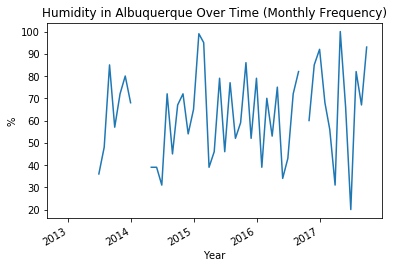

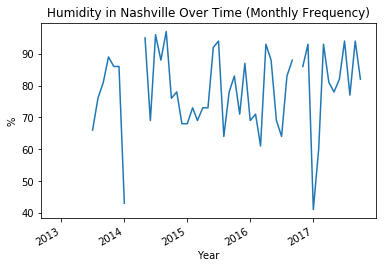

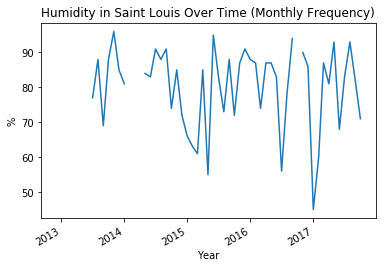

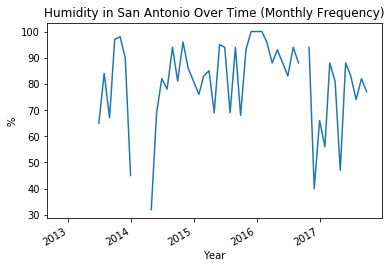

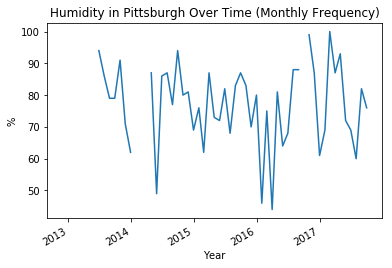

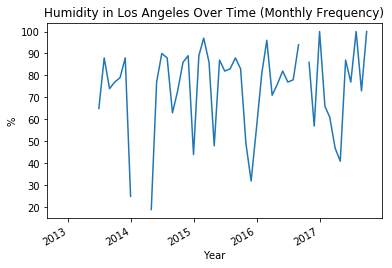

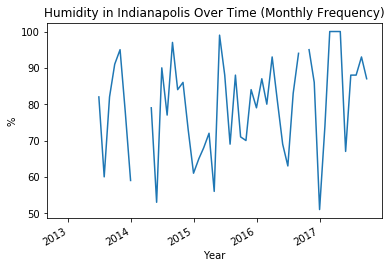

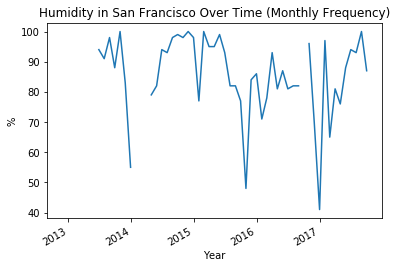

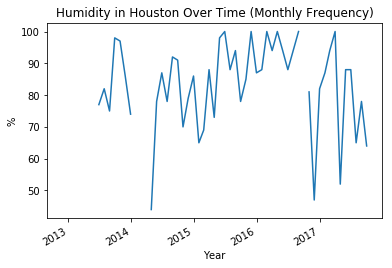

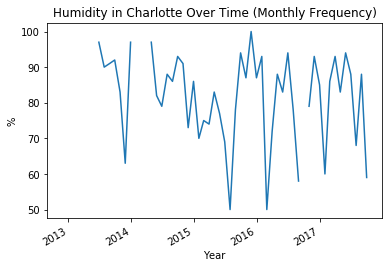

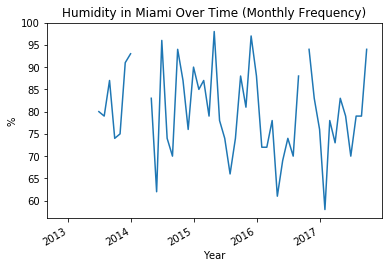

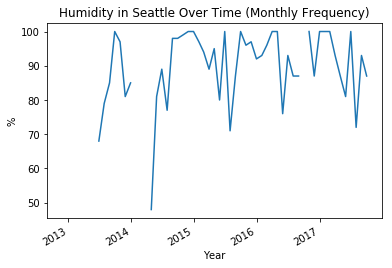

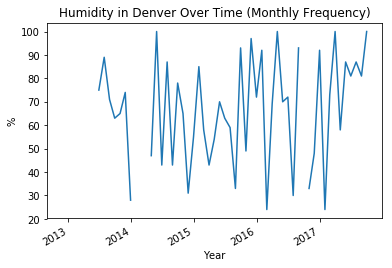

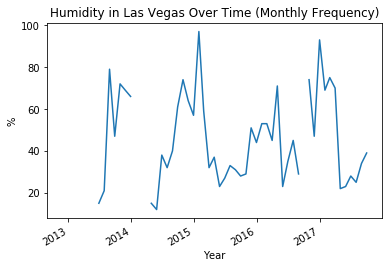

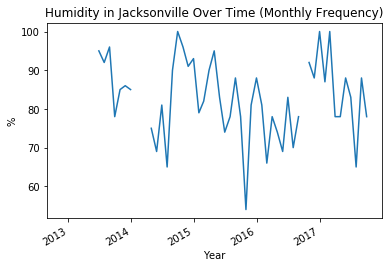

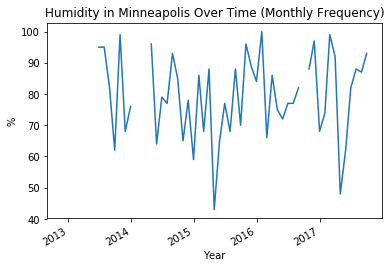

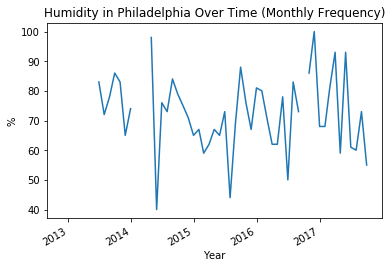

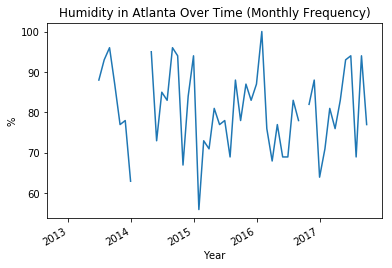

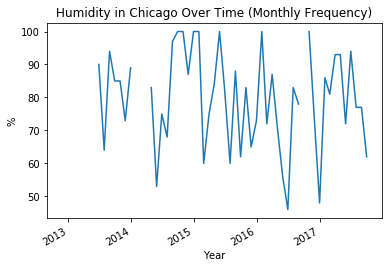

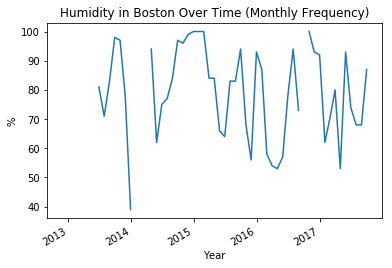

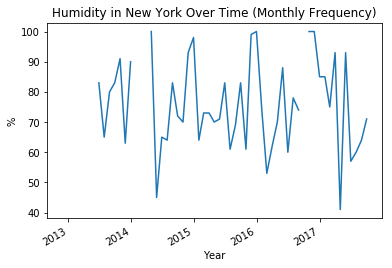

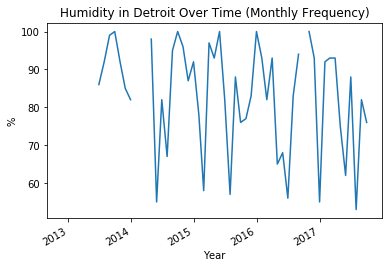

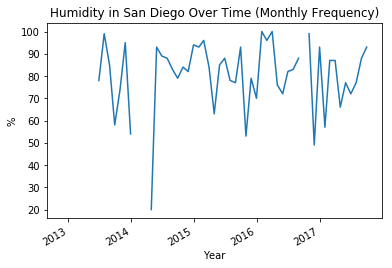

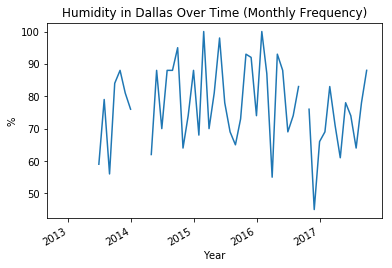

In [12]:
# Let's observe how humidity changes throughout the year 
for city in us_city_set:
    humidity[city].asfreq('M').plot()
    plt.title('Humidity in ' + city + ' Over Time (Monthly Frequency)')
    plt.xlabel('Year')
    plt.ylabel('%')
    plt.show()

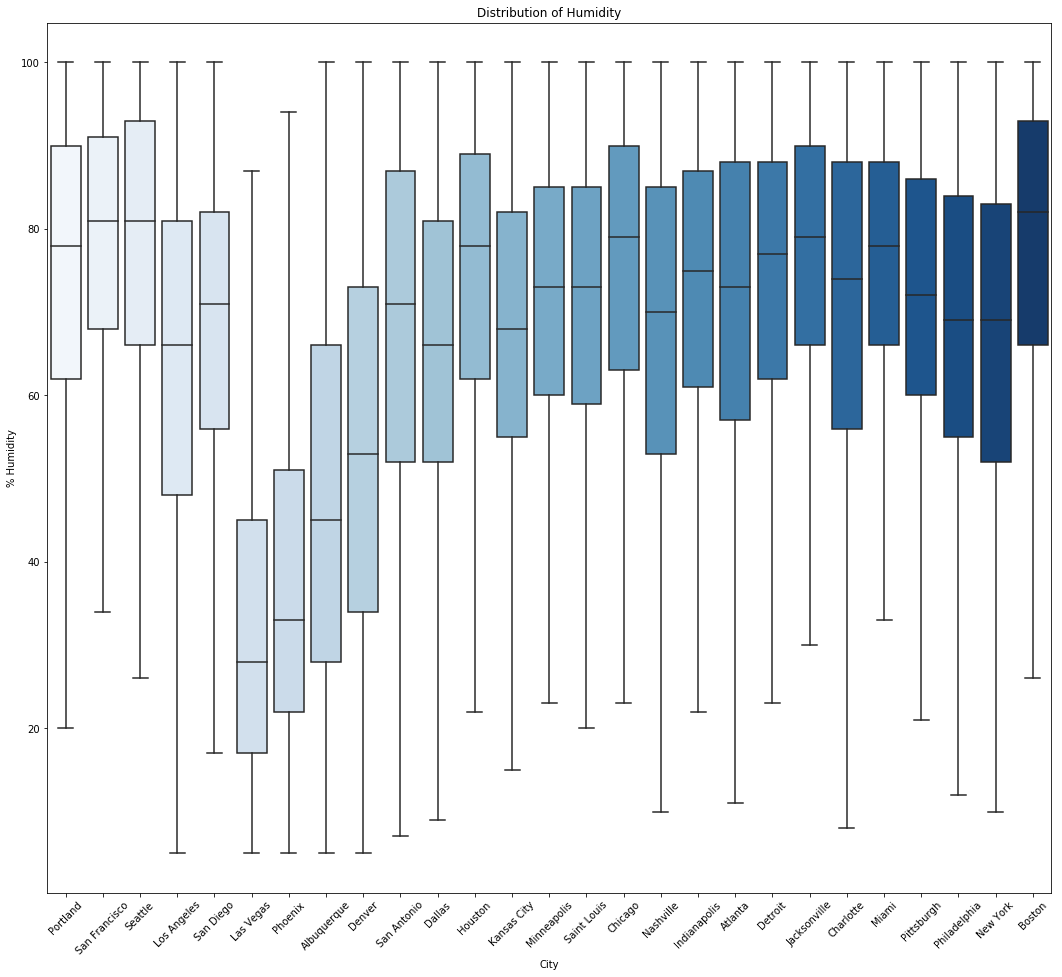

In [13]:
# To better understand the distribution of humidity, I decided to look at a box plot between all the cities
plot_box_df = humidity
fig = plt.figure(figsize=(18, 16))
sns.boxplot( data = plot_box_df, palette="Blues", showfliers=False)
plt.xticks(rotation=45)
plt.ylabel('% Humidity')
plt.xlabel('City')
plt.title('Distribution of Humidity')
plt.show()

In [14]:
# Let's try to identify cities with relative low humidity 
median_humidity = {}
for city in humidity.columns[:]:
    median_humidity[city] = humidity[city].median()

for key, value in median_humidity.items():
    if value < 70:
        print(key, value)

Los Angeles 66.0
Las Vegas 28.0
Phoenix 33.0
Albuquerque 45.0
Denver 53.0
Dallas 66.0
Kansas City 68.0
Philadelphia 69.0
New York 69.0


We can observe that these cities stated above have a relative low median humidity which makes them ideal candidates for wind turbines. We can confirm that these cities tend to have a lower humidity as the interquartile ranges are noticebly lower than other cities. 

## Pressure 

From my research, I do not believe that pressure of the environment has enough of an impact on wind turbines to analyze it further. 

## Wind Direction 

As wind turbines now have the ability to turn and face the direction of the wind, the direction of the wind does not matter as much it would have in the past. Therefore for this data analysis, we will not be focusing on the direction of the wind.

## Wind Speed

Wind Speed is a major component of this process. Therefore, we will dive deeper into this in another jupyter notebook named wind_power_analysis.ipynb